In [1]:
import os
import h5py
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
qc_file = '../data/qualityControl_Bayrak_v03.xlsx'

In [3]:
df = pd.read_excel(qc_file, index_col=0)
df.index = df.index.map(str)

DF = df.copy(deep=True)
subjlist = DF.index

In [4]:
df_file = '../data/tout_group/cortex_corr_indiv.xlsx'

DF = pd.read_excel(df_file, index_col=0)
DF.index = DF.index.map(str)

In [5]:
len(DF) # subjects passing earlier quality control steps in HCP S900

740

In [6]:
DF['SUB'].mean() - 2.5 * DF['SUB'].std()

0.5339926400963126

In [7]:
DF['CA'].mean() - 2.5 * DF['CA'].std()

0.46755916163952005

In [8]:
DF['DG'].mean() - 2.5 * DF['DG'].std()

0.4280198842504976

## similarity of individual-level functional connectivity to the group-level fc

## SUB fc

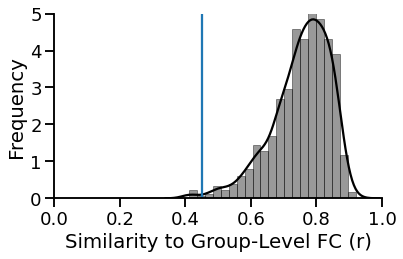

In [9]:
sns.set_context("talk", font_scale=1.1)
ax = sns.distplot(DF['SUB'], 
                  hist_kws=dict(edgecolor="k", linewidth=1),
                  color='k')
sns.despine()
ax.set(xlim=(0,1))
ax.set(ylabel='Frequency')
ax.set(xlabel='Similarity to Group-Level FC (r)')
plt.axvline(0.45, 0, 5)
ax.set(ylim=(0,5))
plt.tight_layout()


## CA fc

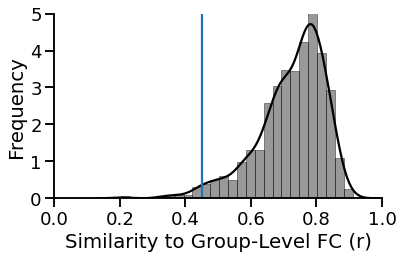

In [10]:
sns.set_context("talk", font_scale=1.1)
ax = sns.distplot(DF['CA'], 
                  hist_kws=dict(edgecolor="k", linewidth=1),
                  color='k')
sns.despine()
ax.set(xlim=(0,1))
ax.set(ylim=(0,5))
ax.set(ylabel='Frequency')
ax.set(xlabel='Similarity to Group-Level FC (r)')
plt.axvline(0.45, 0, 5)
plt.tight_layout()

## DG fc

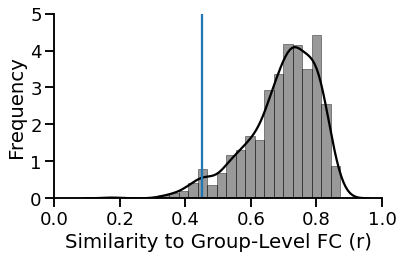

In [11]:
sns.set_context("talk", font_scale=1.1)
ax = sns.distplot(DF['DG'], 
                  hist_kws=dict(edgecolor="k", linewidth=1),
                  color='k')
sns.despine()
ax.set(xlim=(0,1))
ax.set(ylim=(0,5))
ax.set(ylabel='Frequency')
ax.set(xlabel='Similarity to Group-Level FC (r)')
plt.axvline(0.45, 0, 5)
plt.tight_layout()

# variance explained by the gradients of functional connectivity

### left hemisphere

In [12]:
ddir = '../data/tout_group/'

# get Gradients
h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_left_lambdas.h5'), 'r');
eig_val = np.array(h1['lambdas_'])
# percentage of varience per eigenvector
perc_var = eig_val / np.sum(eig_val)*100


In [13]:
perc_var[0:10]

array([23.60520393,  8.8411861 ,  6.46484357,  4.68641493,  3.48788834,
        2.58731012,  2.32746842,  1.69268623,  1.5841458 ,  1.32892144])

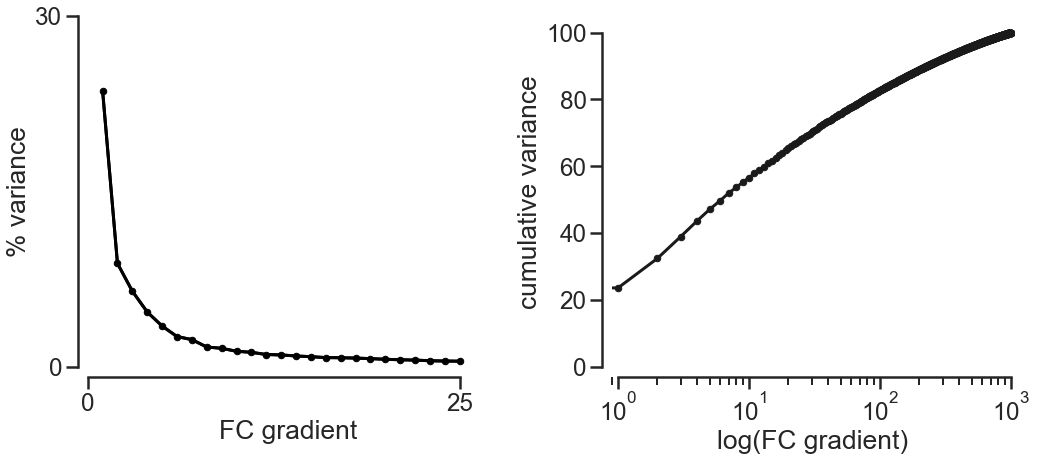

In [14]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")
fig=plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(121)
nums = np.arange(25)
nums = nums +1 
plt.plot(nums, perc_var[0:25], color='black')
plt.plot(nums, perc_var[0:25], color='black', marker='.', markersize=13)
plt.xlim([0.5, 27])
plt.xticks([0, 25])
plt.ylim([0, 30])
plt.yticks([0, 30])
plt.ylabel('% variance')
plt.xlabel('FC gradient')

ax2 = fig.add_subplot(122)
vals = np.cumsum(perc_var)
vals = np.hstack((0,vals))
ax2.semilogx(vals, marker='.', color='k', markersize=13)
plt.ylim([0, 105])
plt.xlim([0.9, 1050])
plt.ylabel('cumulative variance')
plt.xlabel('log(FC gradient)')


sns.despine(offset=10, trim=True)
fig.tight_layout()
sns.set()



### right hemisphere

In [15]:
ddir = '../data/tout_group/'

# get Gradients
h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_right_lambdas.h5'), 'r');
eig_val = np.array(h1['lambdas_'])
# percentage of varience per eigenvector
perc_var = eig_val / np.sum(eig_val)*100


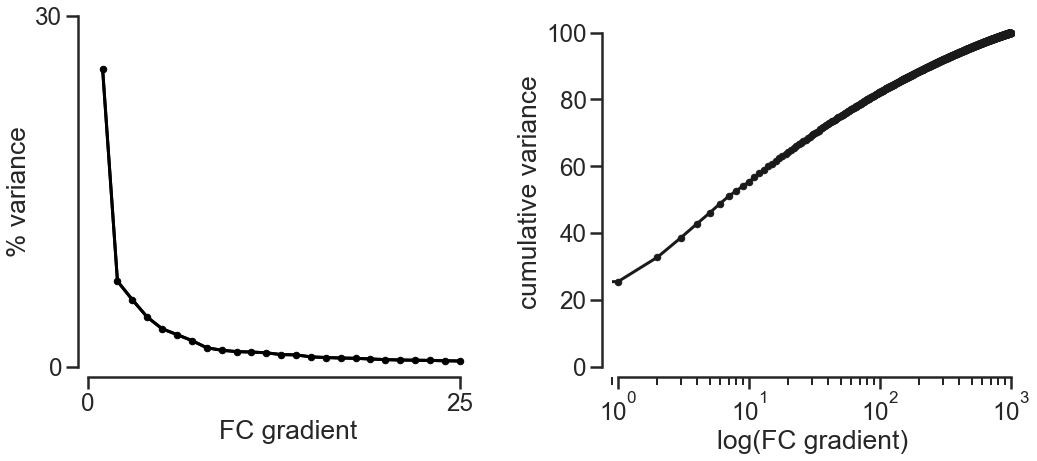

In [16]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")
fig=plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(121)
nums = np.arange(25)
nums = nums +1 
plt.plot(nums, perc_var[0:25], color='black')
plt.plot(nums, perc_var[0:25], color='black', marker='.', markersize=13)
plt.xlim([0.5, 27])
plt.xticks([0, 25])
plt.ylim([0, 30])
plt.yticks([0, 30])
plt.ylabel('% variance')
plt.xlabel('FC gradient')

ax2 = fig.add_subplot(122)
vals = np.cumsum(perc_var)
vals = np.hstack((0,vals))
ax2.semilogx(vals, marker='.', color='k', markersize=13)
plt.ylim([0, 105])
plt.xlim([0.9, 1050])
plt.ylabel('cumulative variance')
plt.xlabel('log(FC gradient)')


sns.despine(offset=10, trim=True)
fig.tight_layout()
sns.set()

